In [44]:
"""##Linear Regression
Regression Modeling in Python

This notebook covers:

- Simple Linear Regression
- Multiple Linear Regression
- Multicollinearity Analysis
- Logistic Regression
- Categorical Variables in Regression
- Quadratic (Polynomial) Regression

Datasets Used:
- Butler dataset
- Butler with Gas Consumption
- Butler Highway
- Reynolds dataset """


'##Linear Regression\nRegression Modeling in Python\n\nThis notebook covers:\n\n- Simple Linear Regression\n- Multiple Linear Regression\n- Multicollinearity Analysis\n- Logistic Regression\n- Categorical Variables in Regression\n- Quadratic (Polynomial) Regression\n\nDatasets Used:\n- Butler dataset\n- Butler with Gas Consumption\n- Butler Highway\n- Reynolds dataset '

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"D:\Hands on Stat\butler (1).xlsx")
df.head()

,Assignment,Miles,Time
0,1,100,9.3
1,2,50,4.8
2,3,100,8.9
3,4,100,6.5
4,5,50,4.2


In [4]:
X = df[['Miles']]
y = df['Time']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

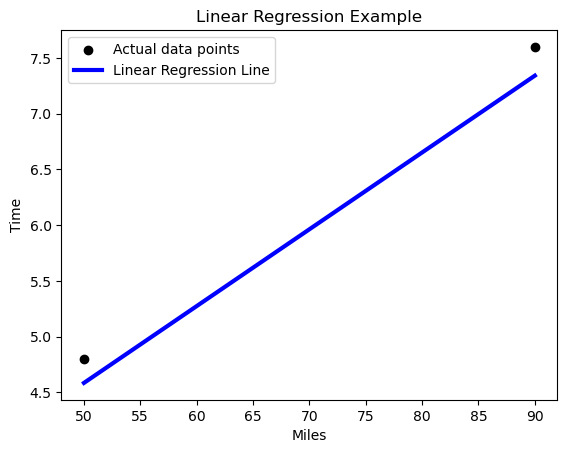

In [8]:
plt.scatter(X_test, y_test, color='black', label='Actual data points')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression Line')
plt.xlabel('Miles')
plt.ylabel('Time')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

In [9]:
## Least Squares Method
# Extract variables
x = df['Miles']
y = df['Time']

# Means
x_mean = x.mean()
y_mean = y.mean()

# Compute slope (beta_1)
beta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()

# Compute intercept (beta_0)
beta_0 = y_mean - beta_1 * x_mean

beta_0, beta_1

(1.2739130434782604, 0.06782608695652174)

In [10]:
y_hat = beta_0 + beta_1 * x

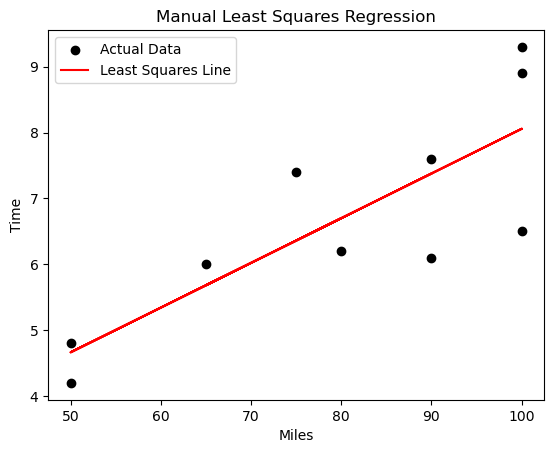

In [11]:
plt.scatter(x, y, color='black', label='Actual Data')
plt.plot(x, y_hat, color='red', label='Least Squares Line')
plt.xlabel('Miles')
plt.ylabel('Time')
plt.title('Manual Least Squares Regression')
plt.legend()
plt.show()

In [12]:
# Predict Time for a given number of miles
miles_value = 50
predicted_time = beta_0 + beta_1 * miles_value
predicted_time

4.665217391304347

In [13]:
# Actual values
y_actual = df['Time']

# Predicted values from manual regression
y_predicted = beta_0 + beta_1 * df['Miles']

# Mean of Y
y_mean = y_actual.mean()

# Total Sum of Squares (SST)
SST = ((y_actual - y_mean) ** 2).sum()

# Error Sum of Squares (SSE)
SSE = ((y_actual - y_predicted) ** 2).sum()

# Regression Sum of Squares (SSR)
SSR = ((y_predicted - y_mean) ** 2).sum()

SST, SSR, SSE

(23.900000000000002, 15.871304347826094, 8.028695652173916)

In [14]:
SST, SSR + SSE

(23.900000000000002, 23.90000000000001)

In [15]:
R_squared = SSR / SST
R_squared

0.6640713116245227

In [16]:
R_squared_alt = 1 - (SSE / SST)
R_squared_alt

0.6640713116245224

In [17]:
model = LinearRegression()
model.fit(df[['Miles']], df['Time'])

model.score(df[['Miles']], df['Time'])

0.6640713116245224

In [18]:
# so 66% of the variation in delivery time is explained by miles driven

In [19]:
## Multiple Linear Regression
# predictors
X = df[['Miles', 'Assignment']]

# target
y = df['Time']
model_multi = LinearRegression()
# Fit model
model_multi.fit(X, y)

LinearRegression()

In [20]:
model_multi.intercept_, model_multi.coef_

(1.8756592827004193, array([ 0.06737869, -0.10290084]))

In [21]:
model_multi.score(X, y)

0.7005929682396765

In [22]:
df[['Miles', 'Assignment']].corr()

,Miles,Assignment
Miles,1.000000,-0.028116
Assignment,-0.028116,1.000000


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add constant
X_vif = sm.add_constant(df[['Miles', 'Assignment']])

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

vif_data

,Feature,VIF
0,const,23.699103
1,Miles,1.000791
2,Assignment,1.000791


In [24]:
df_encoded = pd.get_dummies(df, columns=['Assignment'], drop_first=True)
df_encoded.head()

,Miles,Time,Assignment_2,Assignment_3,Assignment_4,Assignment_5,Assignment_6,Assignment_7,Assignment_8,Assignment_9,Assignment_10
0,100,9.3,0,0,0,0,0,0,0,0,0
1,50,4.8,1,0,0,0,0,0,0,0,0
2,100,8.9,0,1,0,0,0,0,0,0,0
3,100,6.5,0,0,1,0,0,0,0,0,0
4,50,4.2,0,0,0,1,0,0,0,0,0


In [25]:
X = df_encoded.drop(columns=['Time'])
y = df_encoded['Time']

model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(-0.8194470540867052,
 array([ 0.10119447,  0.55972353, -0.4       , -2.8       , -0.04027647,
        -1.07611059,  0.62986176,  0.24180647, -0.68805529, -2.18805529]))

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
ds = pd.read_csv(r"D:\Hands on Stat\butlerwithdeliveries (1).csv")
# Assuming 'Assignment', 'Miles', and 'Deliveries' as independent variables and 'Time' as the dependent variable
X = ds[['Assignment', 'Miles', 'Deliveries']]
y = ds['Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a multiple regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
# Print the coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Coefficients: [0.00099512 0.06599474 0.68395776]
Intercept: 0.05962003320038978
Mean Squared Error (MSE): 0.7500179397154277
R-squared: 0.7863392896049792


In [28]:
import numpy as np
df = pd.read_csv(r"D:\Hands on Stat\butlerwithdeliveries (1).csv")

X_train = df[['Assignment', 'Deliveries', 'Miles']]
y_train = df['Time']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
deliveries_range = np.linspace(min(df['Deliveries']), max(df['Deliveries']), 100)
miles_range = np.linspace(min(df['Miles']), max(df['Miles']), 100)

D, M = np.meshgrid(deliveries_range, miles_range)

X_pred = pd.DataFrame({
    'Assignment': np.zeros(D.size),
    'Deliveries': D.flatten(),
    'Miles': M.flatten()
})

Z = model.predict(X_pred).reshape(D.shape)

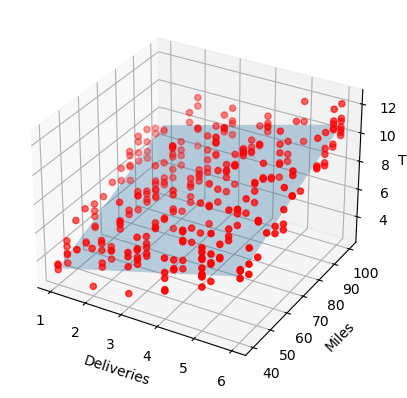

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Deliveries'], df['Miles'], df['Time'], color='red')
ax.plot_surface(D, M, Z, alpha=0.3)

ax.set_xlabel('Deliveries')
ax.set_ylabel('Miles')
ax.set_zlabel('Time')

plt.show()

In [31]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv(r"D:\Hands on Stat\butlerwithgasconsumption (1).csv")

X = df[['Miles', 'Gasoline Consumption']]
y = df['Time']

X = sm.add_constant(X)

In [32]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           4.10e-43
Time:                        09:39:49   Log-Likelihood:                -524.70
No. Observations:                 300   AIC:                             1055.
Df Residuals:                     297   BIC:                             1067.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4931 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv(r"D:\Hands on Stat\butlerhighway (1).csv")

X = df[['Miles', 'Deliveries', 'Time']]
y = df['Highway']
df_clean = df.dropna()

X = df_clean[['Miles', 'Deliveries', 'Time']]
y = df_clean['Highway']

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()


X = sm.add_constant(X)

model = sm.Logit(y, X).fit()

y_pred = model.predict(X)

residuals = y - y_pred.round()

df['Congested_Highway'] = df['Highway'].apply(
    lambda x: 'With Congestion' if x == 1 else 'Without Congestion'
)

Optimization terminated successfully.
         Current function value: 0.471005
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471005
         Iterations 6


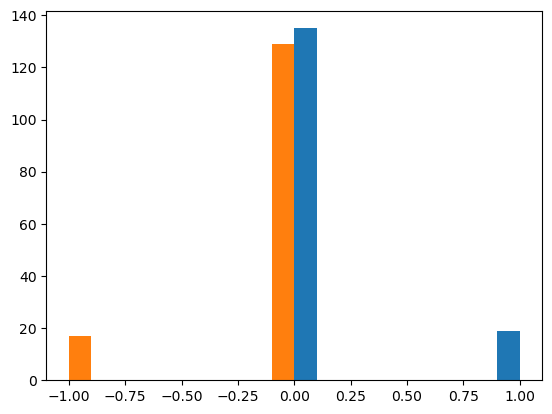

In [34]:
plt.hist(residuals[df['Congested_Highway'] == 'With Congestion'])
plt.hist(residuals[df['Congested_Highway'] == 'Without Congestion'])
plt.show()

In [36]:
df = df.dropna()
X = df[['Miles', 'Deliveries', 'Highway']]
X = sm.add_constant(X) # Add a constant term for the intercept
y = df['Time']
# Fit the linear regression model
model = sm.OLS(y, X).fit()
# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     750.5
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          5.78e-138
Time:                        09:43:10   Log-Likelihood:                -300.42
No. Observations:                 300   AIC:                             608.8
Df Residuals:                     296   BIC:                             623.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3302      0.168     -1.969      0.0

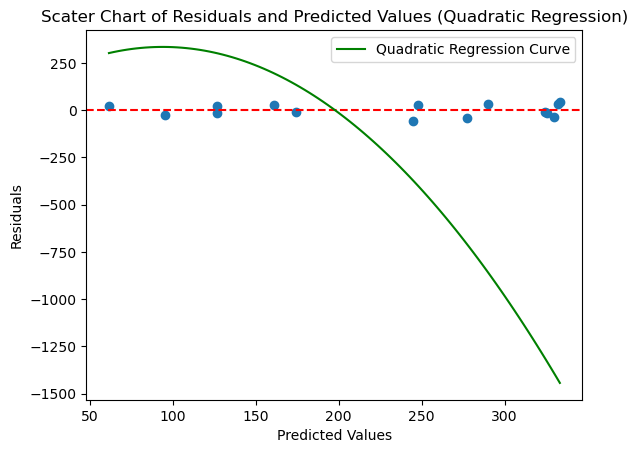

In [41]:
# modeling nonlinear relationships
df = pd.read_excel(r"D:\Hands on Stat\reynolds.xlsx")
# Assume 'Months Employed' as the independent variable
# and include the square of 'Months Employed' as a second independent variable
df['Months_Squared'] = df['Months Employed'] ** 2
# Independent variables: 'Months Employed' and 'Months_Squared'
X = df[['Months Employed', 'Months_Squared']]
y = df['Scales Sold']
# Fit a quadratic regression model
model = LinearRegression()
model.fit(X, y)
# Predicted values and residuals
predicted_values = model.predict(X)
residuals = y - predicted_values
# Create a Scater Chart with the regression curve
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0 for reference
# Plot the regression curve
x_values = np.linspace(min(predicted_values), max(predicted_values), 100)
y_values = model.predict(pd.DataFrame({'Months Employed': x_values, 'Months_Squared': x_values**2}))
plt.plot(x_values, y_values, color='green', label='Quadratic Regression Curve')
plt.title('Scater Chart of Residuals and Predicted Values (Quadratic Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()